In [133]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

## 1.1 读取多个时次的模式预报数据 TEMP

In [135]:
%time
directory850 = "ECMWF_HR/HGT/850"
directory500 = "ECMWF_HR/HGT/500"
fhours = np.arange(0, 120, 24)
filenames = ['22062420.'+'%03d'%(fhour) for fhour in fhours]
H850 = get_model_grids(directory850, filenames, varname='hgt', varattrs={'long_name':'850hPa HGT', 'units':'m'}, cache=False)
H500 = get_model_grids(directory500, filenames, varname='hgt', varattrs={'long_name':'500hPa HGT', 'units':'m'}, cache=False)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [136]:
H500

<xarray.Dataset>
Dimensions:                  (time: 5, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-24T20:00:00 ... 20...
  * level                    (level) float32 500.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2022-06-24T20:00:00
    forecast_period          (time) float64 0.0 24.0 48.0 72.0 96.0
Data variables:
    hgt                      (time, level, lat, lon) float32 586.3 ... 567.2
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

<xarray.DataArray 'hgt' (time: 5, lat: 120, lon: 160)>
array([[[439.2531 , 439.12808, 439.06558, ..., 437.8031 , 437.82806,
         437.84064],
        [439.40308, 439.3031 , 439.19058, ..., 437.6906 , 437.81558,
         437.8781 ],
        [439.56558, 439.4781 , 439.34058, ..., 437.57806, 437.65308,
         437.7531 ],
        ...,
        [434.49057, 435.39062, 436.1156 , ..., 427.07812, 427.0656 ,
         427.11563],
        [434.8406 , 436.1281 , 436.65308, ..., 427.1781 , 427.0656 ,
         427.12808],
        [434.8156 , 436.29062, 436.26562, ..., 427.32812, 427.1656 ,
         427.10312]],

       [[439.8486 , 439.7611 , 439.6861 , ..., 437.2486 , 437.1861 ,
         437.11108],
        [440.06107, 439.9986 , 439.8736 , ..., 437.27362, 437.24857,
         437.1486 ],
        [440.2361 , 440.1986 , 440.04858, ..., 437.28607, 437.26108,
         437.16107],
...
        [435.80197, 436.70197, 437.41443, ..., 428.88947, 428.91446,
         428.96445],
        [435.91443, 437.17

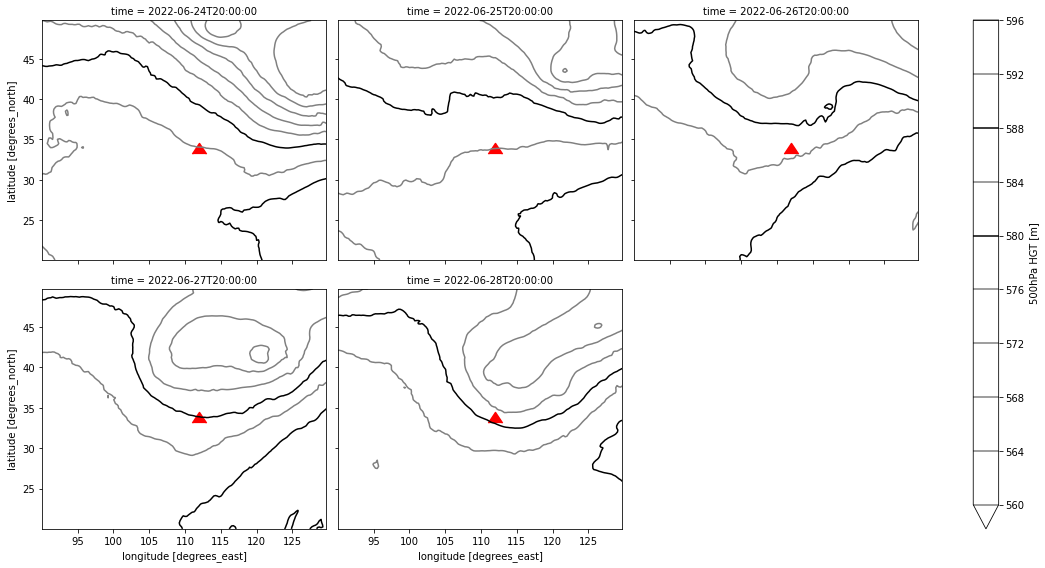

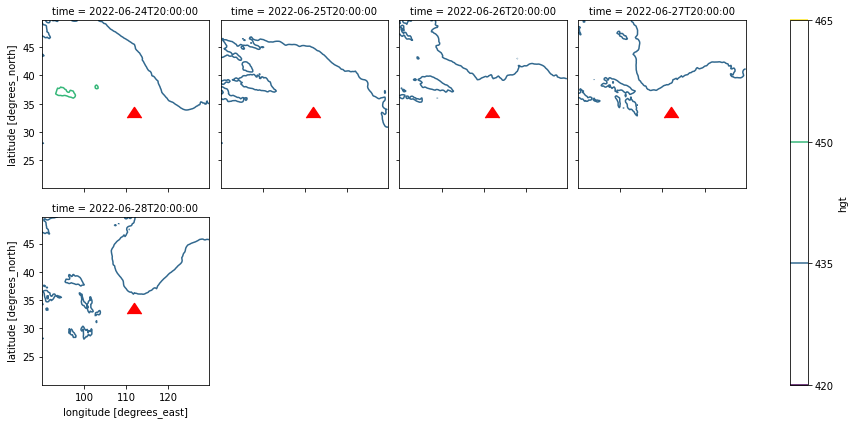

In [137]:
# 绘制图像
left = 90
right=130
top = 50
bottom = 20

H850 = H850.hgt.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")
H500 = H500.hgt.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

H500colors = ['gray']*10
H500colors[-3] = H500colors[-5] = 'black'

p = H500.plot.contour(figsize=(16, 8), col='time', col_wrap=3, levels=np.arange(560,600,4), colors = H500colors, add_colorbar=True) #[24, 28]

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)



H500_850 = H500 - H850
print(H500_850)

p = H500_850.plot.contour(col='time', col_wrap=4, levels=3,add_colorbar=True)

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)

## 1.2 Draw High Plot

In [138]:
plot500 = get_station_data("UPPER_AIR/PLOT/500", "20220625080000.000", dropna=True, cache=False)
plot500

,ID,lon,lat,Alt,Dewpoint_depression,Geopotential_hight,Temp,Wind_angle,Wind_speed,time
0,47104,128.850006,37.799999,80.000000,15.0,574.000000,-11.3,270.0,24.0,2022-06-25 08:00:00
1,83971,-51.180000,-30.000000,3.000000,14.0,579.000000,-12.7,275.0,30.0,2022-06-25 08:00:00
2,29698,99.029999,54.880001,411.000000,6.0,564.000000,-14.7,285.0,12.0,2022-06-25 08:00:00
3,55299,92.059998,31.480000,4508.299805,1.9,584.099976,-0.3,258.0,3.9,2022-06-25 08:00:00
4,76805,-99.750000,16.750000,3.000000,7.0,587.000000,-5.7,125.0,4.0,2022-06-25 08:00:00
...,...,...,...,...,...,...,...,...,...,...
471,56312,94.360001,29.650000,2989.600098,0.0,585.299988,-1.5,214.0,6.5,2022-06-25 08:00:00
472,22522,34.650002,64.949997,8.000000,16.0,572.000000,-12.7,305.0,29.0,2022-06-25 08:00:00
473,58362,121.440002,31.389999,6.700000,28.9,584.599976,-6.3,293.0,6.7,2022-06-25 08:00:00
474,30715,103.849998,52.480000,436.000000,14.0,569.000000,-14.3,275.0,13.0,2022-06-25 08:00:00


In [139]:
plot500 = plot500.dropna(how='any')
plot500 = plot500[(bottom <= plot500['lat']) & (plot500['lat'] <= top) &
                    (left <= plot500['lon']) & (plot500['lon'] <= right)]

/tmp/ipykernel_4703/349443167.py:7: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  cntr = ax.tricontour(plot500.lon, plot500.lat, plot500.Geopotential_hight, levels=levels, add_colorbar=True)


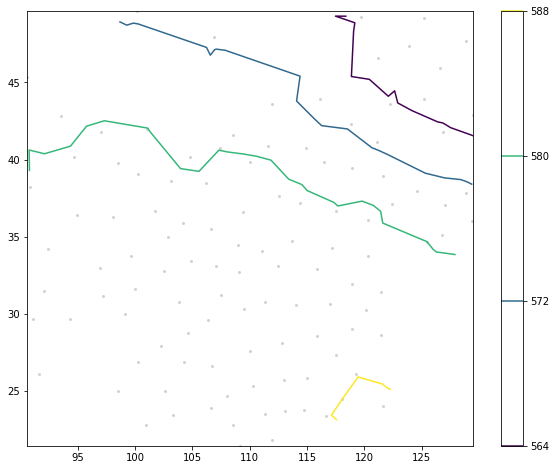

In [140]:
# plot:
fig, ax = plt.subplots(figsize=(10, 8))

levels = [564, 572, 580, 588]

ax.plot(plot500.lon, plot500.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(plot500.lon, plot500.lat, plot500.Geopotential_hight, levels=levels, add_colorbar=True)

fig.colorbar(cntr, ax=ax)

## 1.3 Draw High Diff

In [141]:
dti = pd.date_range("2022-06-24 20:00", periods=6, freq="-12H").to_series()

filenames = dti.dt.strftime("%y%m%d%H")

""" 
BEIJING_MR/HGT/500/22062420.000 
"ECMWF_HR/HGT/500"
GRAPES_GFS/HGT/500/22062420.000
"GERMAN_HR/GEOPOTENTIAL/500"
JAPAN_MR/HGT/500/22062420.000
NCEP_GFS_HR/HGT/500/22062408.000

SHANGHAI_MR/HGT/500/22062420.000
"""
directory500 = 'ECMWF_HR/HGT/500'
fhours = np.arange(12, 12*7, 12)
filenames = filenames + '.' + ['%03d'%(fhour) for fhour in fhours]

print(filenames)

H500 = get_model_grids(directory500, filenames, varname='hgt', varattrs={'long_name':'500hPa HGT', 'units':'m'}, allExists=False, cache=False)

H500

2022-06-24 20:00:00    22062420.012
2022-06-24 08:00:00    22062408.024
2022-06-23 20:00:00    22062320.036
2022-06-23 08:00:00    22062308.048
2022-06-22 20:00:00    22062220.060
2022-06-22 08:00:00    22062208.072
Freq: -12H, dtype: object


<xarray.Dataset>
Dimensions:                  (time: 6, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-25T08:00:00 ... 20...
  * level                    (level) float32 500.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  (time) datetime64[ns] 2022-06-24T20:00:00 ... 20...
    forecast_period          (time) float64 12.0 24.0 36.0 48.0 60.0 72.0
Data variables:
    hgt                      (time, level, lat, lon) float32 585.1 ... 563.2
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

6


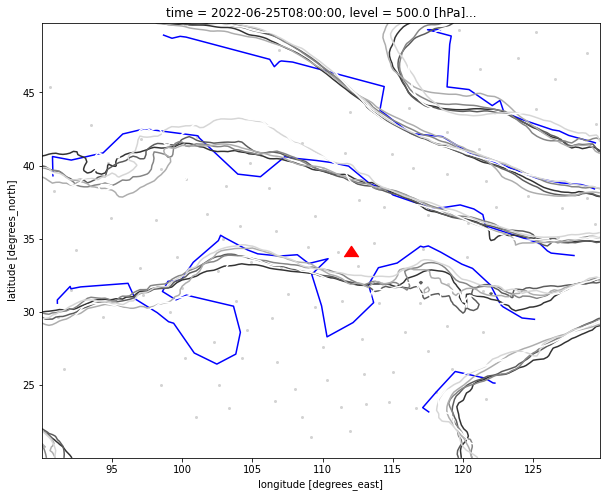

In [142]:
fig, ax = plt.subplots(figsize=(10, 8))

levels = [564, 572, 580, 584,  588]

ax.plot(plot500.lon, plot500.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(plot500.lon, plot500.lat, plot500.Geopotential_hight, levels=levels, colors = 'blue') #add_colorbar=True

#fig.colorbar(cntr, ax=ax)
ax.scatter(112, 34.5, s=200, c='red', marker=6)

H500Area = H500.hgt.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

print(H500Area.shape[0])
for index in range(0,H500Area.shape[0]):
    colors = index/5 * (1-0.2) + 0.2
    H500Area.isel(time=index).plot.contour(ax = ax, levels=levels, colors = str(colors) )
    pass


In [143]:
['gray']*6

['gray', 'gray', 'gray', 'gray', 'gray', 'gray']